# MINI DATA SCIENCE BOOTCAMP (3/3)
## Parte 3 - Creacion y comparacion de moldelos ML

Nos centraremos en la creación de 2 modelos de aprendizaje automático supervisados: ** clasificación y regresión **. Seguiremos los siguientes pasos para cada una de estas soluciones.

1. Selección e ingeniería de atributos
2. Medidas de desempeño
3. Creación de modelos
4. Ajuste y optimización del modelo
5. Selección de modelo 


### Modelos de Machine Learning (Aprendizaje automatico)

Nos centraremos en 2 tipos de modelos de AA en esta sesión. Ambos son de naturaleza supervisada (las etiquetas son conocidas y deben predecirse). 
  

**Clasificación**
Un problema de clasificación es cuando la variable de salida es una categoría (nominal), como “rojo” o “azul” o “enfermedad” y “sin enfermedad”.
  
**Regresión**
Un problema de regresión es cuando la variable de salida es un valor real (numérico), como "dólares" o "peso". 
  
Referencia - https://towardsdatascience.com/introduction-to-machine-learning-for-beginners-eed6024fdb08

---


## Datasets

En esta sección, importaremos todos los paquetes necesarios y cargaremos los conjuntos de datos en los que planeamos trabajar.
Para este ejercicio, hemos seleccionado 2 conjuntos de datos: 


1.   [Boston Housing Data](https://www.kaggle.com/c/boston-housing)
2.   [Iris Dataset](https://www.kaggle.com/arshid/iris-flower-dataset)

Ambos conjuntos de datos están disponibles a través de sklearn, no necesitan descargarlos por separado. 



In [ ]:
#Importamos todos los paquetes necesarios
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

**Bajamos los datasets y los convertimos en Pandas DataFrame**

In [ ]:
#IRIS DATASET
iris_raw = datasets.load_iris()

#iris_raw es del tipo de datos interno sklearn.
# Convertirlo a marco de datos de pandas para que podamos analizar los datos más fácilmente 
iris = pd.DataFrame(iris_raw.data, columns=iris_raw.feature_names)
#target es la columna predict_to, en este caso es una especie y de naturaleza categórica. 
iris['species'] = iris_raw.target

print(iris.shape)
iris.head(5)

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#BOSTON DATASET
boston_raw = datasets.load_boston()
#https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/

#boston_raw es del tipo de datos interno sklearn.
# Convertirlo a marco de datos de pandas para que podamos analizar los datos más fácilmente 

boston = pd.DataFrame(boston_raw.data, columns=boston_raw.feature_names)
#target es la columna predict_to, en este caso es una medv y de naturaleza numerica. 
boston['MEDV'] = boston_raw.target

print(boston.shape)
boston.head(5)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
print(boston_raw.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### División de los datos 

En los problemas de aprendizaje automático, dividimos los conjuntos de datos en 2 partes para que la creación y las pruebas del modelo sean más eficientes. 

1.   Training - 80%
2.   Testing - 20%

Creamos un modelo con el 80% de los datos y con el otro 20% se testea para ver si la hipótesis que formulamos en el 80% realmente se puede generalizar para el conjunto de datos. 
No realizaremos ningún análisis con los datos de prueba (20%) por lo que no conocemos ninguna información al respecto.

Su modelo se entrena con el 80% de los datos y este modelo se experimenta con los datos del 20% para generar métricas sobre el rendimiento del modelo.

Dividamos nuestros conjuntos de datos en train (entrenamiento) y test (prueba).

Overfitting y underfitting: Sobreajuste 

> Indented block



https://towardsdatascience.com/overfitting-vs-underfitting-a-conceptual-explanation-d94ee20ca7f9

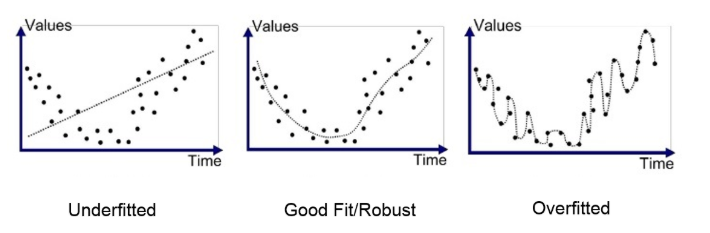

Overfitting: demasiada confianza en los datos de entrenamiento 

Underfitting: una falla en aprender las relaciones en los datos de entrenamiento

High Variance (Varianza alta): el modelo cambia significativamente en función de los datos de entrenamiento

High Bias (Sesgo alto): las suposiciones sobre el modelo llevan a ignorar los datos de entrenamiento

Overfitting (sobreajuste)y underfitting (desajuste) rovocan una mala generalización en el conjunto de prueba


Un conjunto de validación para el ajuste del modelo puede evitar un ajuste insuficiente y excesivo. 


In [ ]:
#IRIS DATASET
iris_train,iris_test = model_selection.train_test_split(iris,test_size=0.2)
print("IRIS DATASET: " + str(len(iris)) + " rows")
print("Train = " + str(len(iris_train)) + " rows")
print("Test = " + str(len(iris_test)) + " rows")

#Restablecimiento del índice para el tiempo de predicción 
iris_train = iris_train.reset_index(drop=True)
iris_test = iris_test.reset_index(drop=True)

IRIS DATASET: 150 rows
Train = 120 rows
Test = 30 rows


In [ ]:
#BOSTON DATASET
boston_train,boston_test = model_selection.train_test_split(boston,test_size=0.2)
print("BOSTON DATASET: " + str(len(boston)) + " rows")
print("Train = " + str(len(boston_train)) + " rows")
print("Test = " + str(len(boston_test)) + " rows")

#Restablecimiento del índice para el tiempo de predicción 
boston_train = boston_train.reset_index(drop=True)
boston_test = boston_test.reset_index(drop=True)

BOSTON DATASET: 506 rows
Train = 404 rows
Test = 102 rows


Ahora sus datos están listos para iniciar la selección de atributos y el proceso de ingeniería. 

**Ingenieria de atributos**

Necesitamos decidir qué atributos (columnas) usar para hacer predicciones. Aunque los conjuntos de datos que estamos usando son de naturaleza más pequeña, en la vida real tendemos a trabajar en problemas que tienen múltiples columnas en los datos, lo que requeriría un análisis para ver con qué columnas tendría sentido crear el modelo.

Realizaremos este análisis SÓLO en los datos de entrenamiento.

**Maldición de dimensionalidad**

La maldición de la dimensionalidad se refiere a varios fenómenos que surgen al analizar y organizar datos en espacios de alta dimensión (a menudo con cientos o miles de dimensiones) que no ocurren en entornos de baja dimensión como el espacio físico tridimensional de la experiencia cotidiana.

A medida que aumenta la dimensionalidad, el volumen del espacio aumenta tan rápido que los datos disponibles se vuelven escasos. Esta escasez es problemática para cualquier método que requiera significación estadística.

Por tanto, es fundamental realizar un control de calidad de los datos que se están alimentando al modelo.


Referencia - https://en.wikipedia.org/wiki/Curse_of_dimensionality

### Feature Engineering

**Manipulacion de los datos Null**


¿Alguno de los conjuntos de datos tiene valores nulos que deban manejarse / imputarse?

In [ ]:
iris_train.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

No hay valores nulos para manejar en el conjunto de datos del iris.

In [ ]:
boston_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Tampoco hay valores nulos para manejar en el conjunto de datos de Boston.

Echemos un vistazo al conjunto de datos de Boston.

In [ ]:
boston_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.00000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.631044,10.82302,11.39703,0.061881,0.560393,6.277599,69.834406,3.746964,9.858911,415.725248,18.535891,354.556287,13.030173,22.303713
std,8.132314,23.02556,6.92782,0.241238,0.117493,0.720592,27.449998,2.139460,8.877853,171.083183,2.155166,93.485863,7.231599,9.292736
min,0.006320,0.00000,0.46000,0.000000,0.385000,3.561000,6.200000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.087985,0.00000,5.19000,0.000000,0.453000,5.876750,47.900000,2.060800,4.000000,283.250000,17.400000,374.237500,7.377500,16.575000
50%,0.330135,0.00000,9.90000,0.000000,0.538000,6.183500,79.050000,3.082850,5.000000,336.000000,19.100000,391.305000,12.005000,20.800000
75%,4.232120,12.50000,18.10000,0.000000,0.647000,6.620500,94.300000,4.978850,24.000000,666.000000,20.200000,396.900000,17.172500,25.000000
max,88.976200,95.00000,27.74000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Dado que la columna TAX tiene un mínimo de 187 y un máximo de 711, usaremos el escalado de atributos para forzar los valores entre 0 y 1.

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
boston_train_tax = boston_train[['TAX']]
print("Range before scaling: " + str(boston_train_tax['TAX'].min()) + " - " + str(boston_train_tax['TAX'].max()))
boston_train_tax = min_max_scaler.fit_transform(boston_train_tax)
boston_train_tax_scaled = pd.DataFrame(boston_train_tax, columns=['TAX_SCALED'])
print("Range after scaling: " + str(boston_train_tax_scaled['TAX_SCALED'].min()) + " - " + str(boston_train_tax_scaled['TAX_SCALED'].max()))

Range before scaling: 187.0 - 711.0
Range after scaling: 0.0 - 1.0


Adjunte esto a nuestros datos de train

In [ ]:
boston_train = pd.concat([boston_train, boston_train_tax_scaled], axis=1)
boston_train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_SCALED
0,7.67202,0.0,18.10,0.0,0.6930,5.747,98.9,1.6334,24.0,666.0,20.2,393.10,19.92,8.5,0.914122
1,0.17171,25.0,5.13,0.0,0.4530,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44,16.0,0.185115
2,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92,46.7,0.229008
3,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0,0.070611
4,0.41238,0.0,6.20,0.0,0.5040,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36,31.6,0.229008


** EJERCICIO: ¿Existen atributos significativos que se puedan generar a partir de atributos existentes en los conjuntos de datos de Boston e Iris? **

### Seleccion de atributos

En el conjunto de datos de Boston, ¿hay columnas que no sean útiles o tengan una correlación muy baja?

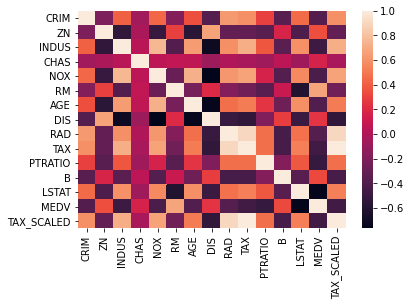

In [ ]:
boston_corr_matrix = boston_train.corr()

sns.heatmap(data=boston_corr_matrix, annot=False)

Dado que MEDV es nuestra columna de predicción, queremos elegir variables que tengan una correlación positiva y negativa con MEDV. Agregar columnas que tienen una correlación baja o inexistente se sumaría a nuestro problema 'La maldición de la dimensionalidad'.

Para esto, seleccionemos solo las 4 atributos más correlacionadas con MEDV para entrenar nuestro modelo.

In [ ]:
# vemos todas las correlaciones a MEDV en orden descendente
boston_corr_matrix['MEDV'].sort_values(ascending=False)

MEDV          1.000000
RM            0.677533
ZN            0.349766
B             0.325232
DIS           0.248895
CHAS          0.172130
RAD          -0.373290
CRIM         -0.385805
AGE          -0.386578
NOX          -0.420235
TAX          -0.459537
TAX_SCALED   -0.459537
INDUS        -0.481183
PTRATIO      -0.510167
LSTAT        -0.744825
Name: MEDV, dtype: float64

Para ello, escojamos 2 variables con alta correlación positiva (RM, ZN) y 2 con alta correlación negativa (PTRATIO, INDUS).

Haremos esto en la sección de pipeline de datos para asegurarnos de que se realicen los mismos procesos en el entrenamiento y en los conjuntos de datos de prueba.

** EJERCICIO: ¿El conjunto de datos de Iris necesita alguna selección de atributos? **

### Data Pipeline

Es importante asegurarse de que su pipeline de datos esté en su lugar para que las operaciones realizadas en un conjunto de datos se puedan replicar en cualquier otro conjunto de datos. Al realizar cualquier ingeniería de atributos, este código se puede implementar en cualquier conjunto de datos para garantizar la coherencia en la experimentación.

Necesitamos replicar la ingeniería de atributos que se realizó en los datos de entrenamiento sobre nuestros datos de prueba. Esto sería fácil si el código se escribe de una manera muy general.

In [ ]:
# En nuestro conjunto de datos de Boston, agregamos una nueva columna llamada TAX_SCALED en nuestros datos de entrenamiento. Necesitamos replicarlo en la prueba.
# Generalizamos el código de arriba en un formato de función para que podamos replicarlo en nuestro conjunto de datos de prueba.
def scaleColumn(df,column_name):
  min_max_scaler = preprocessing.MinMaxScaler()
  df_col = df[[column_name]]
  print("Range before scaling: " + str(df_col[column_name].min()) + " - " + str(df_col[column_name].max()))
  df_col_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_col), columns=[column_name + "_SCALED"])
  new_df = pd.concat([df, df_col_scaled], axis=1)
  #print("Range after scaling: " + str(df_col[column_name + "_SCALED"].min()) + " - " + str(df_col[column_name + "_SCALED"].max()))
  return new_df

In [ ]:
boston_test = scaleColumn(boston_test,'TAX')
boston_test.head(5)

Range before scaling: 188.0 - 666.0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_SCALED
0,0.05425,0.0,4.05,0.0,0.510,6.315,73.4,3.3175,5.0,296.0,16.6,395.60,6.29,24.6,0.225941
1,0.16211,20.0,6.96,0.0,0.464,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59,25.2,0.073222
2,0.97617,0.0,21.89,0.0,0.624,5.757,98.4,2.3460,4.0,437.0,21.2,262.76,17.31,15.6,0.520921
3,0.06911,45.0,3.44,0.0,0.437,6.739,30.8,6.4798,5.0,398.0,15.2,389.71,4.69,30.5,0.439331
4,0.08244,30.0,4.93,0.0,0.428,6.481,18.5,6.1899,6.0,300.0,16.6,379.41,6.36,23.7,0.234310


Si ha realizado otras operaciones en sus datos, generalícelas a una función que se pueda aplicar tanto a su entrenamiento como a sus conjuntos de datos de prueba.

** EJERCICIO: Generaliza cualquier otra operación de datos que hayas realizado en tus datos de entrenamiento **

## Dividir datos en atributos y etiquetas

Para problemas de machine learning (aprendizaje automático), debe dividir sus datos en características y etiquetas.

1.   Atributos - Input X to the model
2.   Etiqueta - Expected output Y

Por lo tanto, dividiremos aún más estos conjuntos de datos de entrenamiento y prueba por columnas, de modo que para cada conjunto de datos tengamos ** atributos ** y ** etiquetas ** para indicar si son las columnas de entrada o las columnas de predicción.

Para el conjunto de datos Iris, usaremos todas las columnas como atributos de entrada y predeciremos 'species'

In [ ]:
#define input and predict to columns
iris_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris_labels = ['species']

print('IRIS DATASET')
print("Features - " + str(iris_features))
print("Labels - " + str(iris_labels))

iris_train_features = iris_train[iris_features]
iris_train_labels = iris_train[iris_labels]
print('✔ Train data split into features and labels')

iris_test_features = iris_test[iris_features]
iris_test_labels = iris_test[iris_labels]
print('✔ Test data split into features and labels')

IRIS DATASET
Features - ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels - ['species']
✔ Train data split into features and labels
✔ Test data split into features and labels


Para el conjunto de datos de Boston, usaremos solo las columnas de entrada que seleccionamos del proceso de selección de atributos (RM, ZN, PTRATIO, INDUS) y la columna de salida sería 'MEDV'

In [ ]:
#define input and predict to ccolumns
boston_features = ['RM', 'ZN', 'PTRATIO', 'INDUS']
boston_labels = ['MEDV']

print('BOSTON DATASET')
print("Features - " + str(boston_features))
print("Labels - " + str(boston_labels))

boston_train_features = boston_train[boston_features]
boston_train_labels = boston_train[boston_labels]
print('✔ Train data split into features and labels')

boston_test_features = boston_test[boston_features]
boston_test_labels = boston_test[boston_labels]
print('✔ Test data split into features and labels')

BOSTON DATASET
Features - ['RM', 'ZN', 'PTRATIO', 'INDUS']
Labels - ['MEDV']
✔ Train data split into features and labels
✔ Test data split into features and labels


## Creamos el modelo

### Clasificación con datos de iris

Vamos a utilizar 3 modelos de clasificación diferentes para este ejercicio.

1.   Naive Bayes
2.   Decision Trees
1.   Random Forest



#### Gaussian Naive Bayes
Documentacion en: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

https://machinelearningmastery.com/naive-bayes-for-machine-learning/

Naive Bayes es un algoritmo de clasificación para problemas de binarios (de dos clases) y  múltiples. La técnica es más fácil de entender cuando se describe utilizando valores de entrada binarios o categóricos.

Se le llama Naive Bayes porque el cálculo de las probabilidades de cada hipótesis se simplifica para que su cálculo sea manejable. En lugar de intentar calcular los valores de cada valor de atributo P(d1, d2, d3 | h, se supone que son condicionalmente independientes dado el valor objetivo y se calculan como P(d1 | h) * P(d2 | H)* P(d3 | H) .

In [ ]:
def get_prediction_probability(predictions, probabilities):
  top_probability = pd.Series(dtype = "float64")
  for index in range(0,len(predictions)):
    top_probability = top_probability.append(pd.Series([probabilities[index][predictions[index]]]))
  top_probability.reset_index(drop=True, inplace=True)
  return top_probability

In [ ]:
#Crea el objeto modelo y entrenamiento
gnb = GaussianNB()
gnb.fit(iris_train_features, iris_train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Predicciones en el dataset de testing
#Predicciones en 2 filas 
predictions_gnb = gnb.predict(iris_test_features)
predictions_gnb

array([0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 2])

In [ ]:
predictions_probability_gnb = np.array(get_prediction_probability(predictions_gnb, gnb.predict_proba(iris_test_features)[:,]))
predictions_probability_gnb

array([1.        , 1.        , 0.99999965, 0.99999754, 0.99738546,
       0.99989851, 0.75284399, 1.        , 0.99759093, 1.        ,
       1.        , 0.98237594, 1.        , 0.87058333, 1.        ,
       0.9999989 , 0.99999866, 0.99999951, 0.99935048, 0.9588358 ,
       0.99999981, 1.        , 1.        , 0.98953999, 0.99997858,
       0.99999514, 1.        , 1.        , 0.99997987, 0.99999985])

In [ ]:
#Poniendo las 2 celdas anteriores juntas para crear un df legible
gnb_df = pd.DataFrame(predictions_gnb.reshape(len(predictions_gnb),1))
gnb_df.rename(columns={0:'gnb_prediction'}, inplace=True)
gnb_df['gnb_probability'] = predictions_probability_gnb
gnb_df.head(5)

,gnb_prediction,gnb_probability
0,0,1.000000
1,0,1.000000
2,2,1.000000
3,1,0.999998
4,2,0.997385


In [ ]:
#Concatonar las predicciones de naive bayes con el conjunto de datos iris_test
iris_test = iris_test.reset_index(drop=True)
iris_test_prediction = pd.concat([iris_test_labels, gnb_df], axis=1)
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability
0,0,0,1.000000
1,0,0,1.000000
2,2,2,1.000000
3,1,1,0.999998
4,2,2,0.997385


#### Decision Trees
Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
#Crea el objeto modelo y entrenamiento
dt = tree.DecisionTreeClassifier()
dt.fit(iris_train_features, iris_train_labels)

#Predicciones con el datset de testing
predictions_dt = dt.predict(iris_test_features)

#Obtenemos las probabilidades de esas predicciones
predictions_probability_dt = np.array(get_prediction_probability(predictions_dt, dt.predict_proba(iris_test_features)[:,]))

#Poniendo las 2 celdas anteriores juntas para crear un df legible
dt_df = pd.DataFrame(predictions_dt.reshape(len(predictions_dt),1))
dt_df.rename(columns={0:'dt_prediction'}, inplace=True)
dt_df['dt_probability'] = predictions_probability_dt
dt_df.head(5)

,dt_prediction,dt_probability
0,0,1.0
1,0,1.0
2,2,1.0
3,1,1.0
4,2,1.0


In [ ]:
#Concatonar las predicciones de decision tree (arbol de decision) con el conjunto de datos iris_test
iris_test = iris_test.reset_index(drop=True)
iris_test_prediction = pd.concat([iris_test_prediction, dt_df], axis=1)
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability,dt_prediction,dt_probability
0,0,0,1.000000,0,1.0
1,0,0,1.000000,0,1.0
2,2,2,1.000000,2,1.0
3,1,1,0.999998,1,1.0
4,2,2,0.997385,2,1.0


#### Logistic Regression
Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
#Crea el objeto modelo y entrenamiento
logr = LogisticRegression()
logr.fit(iris_train_features, iris_train_labels)

#Predicciones con el datset de testing
predictions_logr = logr.predict(iris_test_features)

#Obtenemos las probabilidades de esas predicciones
predictions_probability_logr = np.array(get_prediction_probability(predictions_logr, logr.predict_proba(iris_test_features)[:,]))

#Poniendo las 2 celdas anteriores juntas para crear un df legible
logr_df = pd.DataFrame(predictions_logr.reshape(len(predictions_logr),1))
logr_df.rename(columns={0:'logr_prediction'}, inplace=True)
logr_df['logr_probability'] = predictions_probability_logr
logr_df.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,logr_prediction,logr_probability
0,0,0.965322
1,0,0.983880
2,2,0.941081
3,1,0.947786
4,2,0.865873


In [ ]:
#Concatonar las predicciones de decision tree (arbol de decision) con el conjunto de datos iris_test
iris_test_prediction = pd.concat([iris_test_prediction, logr_df], axis=1)
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability,dt_prediction,dt_probability,logr_prediction,logr_probability
0,0,0,1.000000,0,1.0,0,0.965322
1,0,0,1.000000,0,1.0,0,0.983880
2,2,2,1.000000,2,1.0,2,0.941081
3,1,1,0.999998,1,1.0,1,0.947786
4,2,2,0.997385,2,1.0,2,0.865873


Ahora tenemos predicciones de 3 modelos de clasificación en el conjunto de datos de Iris para comparar en la siguiente sección.

### Regresión con datos de Boston

#### Linear Regression
Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
lr = LinearRegression().fit(boston_train_features, boston_train_labels)

#Predicciones con el datset de testing
predictions_lr = lr.predict(boston_test_features)

#Poniendo las 2 celdas anteriores juntas para crear un df legible
lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'lr_prediction'}, inplace=True)
lr_df.head(5)

,lr_prediction
0,26.550528
1,23.105556
2,13.236530
3,31.094241
4,27.443701


In [ ]:
#Concatonar las predicciones de regresion lineal con el conjunto de datos boston
boston_test_prediction = pd.concat([boston_test_labels, lr_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction
0,24.6,26.550528
1,25.2,23.105556
2,15.6,13.236530
3,30.5,31.094241
4,23.7,27.443701


#### Random Forest Regression
Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
rfr = RandomForestRegressor().fit(boston_train_features, boston_train_labels)

#Predicciones con el datset de testing
predictions_rfr = rfr.predict(boston_test_features)

#Poniendo las 2 celdas anteriores juntas para crear un df legible
rfr_df = pd.DataFrame(predictions_rfr.reshape(len(predictions_rfr),1))
rfr_df.rename(columns={0:'rfr_prediction'}, inplace=True)
rfr_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


,rfr_prediction
0,23.135
1,22.268
2,16.783
3,30.574
4,25.005


In [ ]:
#Concatonar las predicciones de decision tree (arbol de decision) con el conjunto de datos boston
boston_test_prediction = pd.concat([boston_test_prediction, rfr_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction,rfr_prediction
0,24.6,26.550528,23.135
1,25.2,23.105556,22.268
2,15.6,13.236530,16.783
3,30.5,31.094241,30.574
4,23.7,27.443701,25.005


#### Support Vector Machines
Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
svm = svm.SVR().fit(boston_train_features, boston_train_labels)

#Predicciones con el datset de testing
predictions_svm = svm.predict(boston_test_features)

#Poniendo las 2 celdas anteriores juntas para crear un df legible
svm_df = pd.DataFrame(predictions_svm.reshape(len(predictions_svm),1))
svm_df.rename(columns={0:'svm_prediction'}, inplace=True)
svm_df.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,svm_prediction
0,23.521255
1,23.754136
2,16.136959
3,26.708692
4,26.397427


In [ ]:
#Concatonar las predicciones de decision tree (arbol de decision) con el conjunto de datos boston
boston_test_prediction = pd.concat([boston_test_prediction, svm_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction,rfr_prediction,svm_prediction
0,24.6,26.550528,23.135,23.521255
1,25.2,23.105556,22.268,23.754136
2,15.6,13.236530,16.783,16.136959
3,30.5,31.094241,30.574,26.708692
4,23.7,27.443701,25.005,26.397427


Ahora tenemos 3 modelos para compartir.

## Performance Measures

Dependiendo del tipo de solución que estemos construyendo (clasificación / regresión), existen diferentes formas de analizar el desempeño de un modelo

###Classification

Dado que el resultado del modelo es una categoría específica, una predicción determinada solo puede ser correcta o incorrecta. Para tal solución, comenzamos construyendo una [confusion matrix](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/), que usaremos para generar las métricas de desempeño.

La matriz de confusión se construye de la siguiente manera donde TP, FP, FN, TN se asignan a recuentos de filas en las que los valores reales y previstos son los valores de fila / columna

![alt text](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

A partir de esta matriz de confusión, podemos crear métricas de rendimiento para un problema de clasificación como se muestra a continuación:

![alt text](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

***Accuracy***
Da una idea general de cuántos casos su modelo hizo una predicción correcta en su conjunto de datos. Si la precisión es 0,6, se puede leer como el 60% de las instancias de prueba se predijeron correctamente.

***Precision***
Con precisión, estamos evaluando nuestros datos por su desempeño de predicciones "positivas".

***Recall/Sensitivity***
Con el recall, estamos evaluando nuestros datos por su desempeño de los verdaderos positivos. Es decir, estamos juzgando qué tan bien pronosticamos positivos cuando el resultado fue Positivo.

***F1-Score***
“F1 es el promedio ponderado de precisión y recall. Por tanto, esta puntuación tiene en cuenta tanto los falsos positivos como los falsos negativos. Intuitivamente, no es tan fácil de entender como la precisión, pero F1 suele ser más útil que la precisión, especialmente si tiene una distribución de clases desigual.” — Renuka Joshi

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd)



***ROC curve/AUC Score***
La curva ROC es una forma de maximizar nuestra precisión del modelo jugando con el umbral de confianza de las predicciones.

![alt text](https://miro.medium.com/max/722/1*pk05QGzoWhCgRiiFbz-oKQ.png)

Reference - https://becominghuman.ai/understand-classification-performance-metrics-cad56f2da3aa

Para nuestro conjunto de datos Iris, usemos la accuracy como nuestra métrica de rendimiento y nuestro objetivo es maximizar este valor.

In [ ]:
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability,dt_prediction,dt_probability,logr_prediction,logr_probability
0,0,0,1.000000,0,1.0,0,0.965322
1,0,0,1.000000,0,1.0,0,0.983880
2,2,2,1.000000,2,1.0,2,0.941081
3,1,1,0.999998,1,1.0,1,0.947786
4,2,2,0.997385,2,1.0,2,0.865873


In [ ]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['gnb_prediction'])

0.9333333333333333

In [ ]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['dt_prediction'])

0.9333333333333333

In [ ]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['logr_prediction'])

0.9333333333333333

### Regression

A diferencia de un problema de clasificación, el objetivo de un problema de regresión es predecir un valor numérico (por ejemplo, el costo de una casa) y sería difícil predecir el valor de una casa de forma precisa. Dado que la salida del modelo es numérica, analizamos qué tan 'lejos' están las predicciones de la verdad básica.

***Mean Absolute Error (MAE)***
![alt text](https://miro.medium.com/max/1280/1*2wWmoXUV8ic6Xz1LvzxWfw.png)
The Mean Absolute Error mide el promedio de la diferencia absoluta entre cada verdad fundamental y las predicciones. El MAE es una medida absoluta de ajuste: en promedio, las predicciones se desvían de las verdades fundamental en un valor de MAE.

    

***Root Mean Squared Error (RMSE)***

![alt text](https://miro.medium.com/max/1984/1*k-OzeL6IuG5fUbsX2lKJfw.png)
The Root Mean Squared Error mide la raíz cuadrada del promedio de la diferencia al cuadrado entre las predicciones y la verdad fundamental. Observe que el RMSE es más grande que el MAE. Dado que el RMSE eleva al cuadrado la diferencia entre las predicciones y la verdad fundamental, cualquier diferencia significativa se hace más sustancial cuando se eleva al cuadrado. RMSE es más sensible a los valores atípicos.


***R-Squared***


![alt text](https://miro.medium.com/max/2568/1*pKx5cF_Fx6nco2KNowSuvA.png)
Si desea comprender qué tan bien las variables independientes "explican" la varianza en su modelo, la fórmula R-Cuadrado puede ser poderosa. Cuanto más débil sea la varianza entre nuestro modelo y el modelo lineal, más fuerte será R ^ Squared.


***Adjusted R-squared***


![alt text](https://miro.medium.com/max/880/1*Ss-l42a56Mt6wxmEUEX1jg.png)
Una de las trampas del R-cuadrado es que siempre mejorará a medida que aumentemos el número de variables. El R-cuadrado ajustado soluciona este problema ya que agrega una penalización al modelo.

Reference - https://becominghuman.ai/understand-regression-performance-metrics-bdb0e7fcc1b3

Usemos RMSE como nuestra métrica para validar los modelos de regresión. Nuestro objetivo es minimizar el valor de RMSE.

In [ ]:
boston_test_prediction.head(5)

,MEDV,lr_prediction,rfr_prediction,svm_prediction
0,24.6,26.550528,23.135,23.521255
1,25.2,23.105556,22.268,23.754136
2,15.6,13.236530,16.783,16.136959
3,30.5,31.094241,30.574,26.708692
4,23.7,27.443701,25.005,26.397427


In [ ]:
mean_squared_error(boston_test_prediction['MEDV'], boston_test_prediction['lr_prediction'])

27.41705969246328

In [ ]:
mean_squared_error(boston_test_prediction['MEDV'], boston_test_prediction['rfr_prediction'])

22.342454007625236

In [ ]:
mean_squared_error(boston_test_prediction['MEDV'], boston_test_prediction['svm_prediction'])

57.05277136399227

## Modelo Tuning & Optimizacion

La mayoría de los modelos le dan control sobre los parámetros para construir el modelo. Construimos modelos predeterminados hasta ahora, echemos un vistazo a un ejemplo en el que construimos un modelo similar con diferentes parámetros y veamos cómo esto afecta la precisión.

In [ ]:
#Creamos el modelo objeto y el entrenamiento 
logr_v2 = LogisticRegression(max_iter=500,fit_intercept=False)
logr_v2.fit(iris_train_features, iris_train_labels)

#Predicciones en los datos de testing
predictions_logr_v2 = logr_v2.predict(iris_test_features)

#Obtener las probabilidades de estas predicciones
predictions_probability_logr_v2 = logr_v2.predict_proba(iris_test_features)[:, 1]

#Poner las predicciones y probabilidades anteriores juntas para crear un df legible
logr_v2_df = pd.DataFrame(predictions_logr_v2.reshape(len(predictions_logr_v2),1))
logr_v2_df.rename(columns={0:'logr_v2_prediction'}, inplace=True)
logr_v2_df['logr_v2_probability'] = predictions_probability_logr_v2
logr_v2_df.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,logr_v2_prediction,logr_v2_probability
0,0,0.058543
1,0,0.018530
2,2,0.110161
3,1,0.842155
4,2,0.237405


In [ ]:
#Concatonar las predicciones del modelo logistico al iris_test dataset
iris_test_prediction = pd.concat([iris_test_prediction, logr_v2_df], axis=1)
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability,dt_prediction,dt_probability,logr_prediction,logr_probability,logr_v2_prediction,logr_v2_probability
0,0,0,1.000000,0,1.0,0,0.965322,0,0.058543
1,0,0,1.000000,0,1.0,0,0.983880,0,0.018530
2,2,2,1.000000,2,1.0,2,0.941081,2,0.110161
3,1,1,0.999998,1,1.0,1,0.947786,1,0.842155
4,2,2,0.997385,2,1.0,2,0.865873,2,0.237405


In [ ]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['logr_prediction'])

0.9333333333333333

In [ ]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['logr_v2_prediction'])

1.0

La adición de los parámetros max_iter y fit_intercept cambió la forma en que se entrenó el modelo y, por lo tanto, cambió las predicciones que generó.

** EJERCICIO: Para los modelos construidos, busque la documentación oficial de sklearn y vea cómo los cambios en los parámetros afectan el rendimiento del modelo. **


## Seleccion del modelo

Se debe seleccionar el modelo con la mejor métrica de rendimiento. En este caso, estamos escribiendo una función que compara las métricas de precisión de varios modelos y devuelve el que tiene la métrica de precisión más alta.

In [ ]:
def maxAccuracy(df, actual_value, model_pred_list):
  max_model = ''
  max_accuracy = 0
  for model in model_pred_list:
    acc = accuracy_score(df[actual_value], df[model])
    if acc > max_accuracy:
      max_model = model
      max_accuracy = acc

  print("MAX: " + max_model + " - " + str(max_accuracy))

In [ ]:
maxAccuracy(iris_test_prediction,'species',['gnb_prediction','dt_prediction','logr_prediction','logr_v2_prediction'])

MAX: logr_v2_prediction - 1.0


** EJERCICIO: Escriba una función similar para encontrar el mejor modelo de regresión (minimizar el RMSE) **



Puedes ir a ver: https://github.com/WWCode-SV/Mini_Data_Science_Bootcamp/blob/master/hotel_booking.ipynb